In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

from KS_solver import KS_step
from jax_models import *

In [4]:
def f_rand(L):
    nwaves = 6
    a = np.arange(nwaves)+1
    b = np.random.rand(nwaves)
    d = np.random.rand(nwaves)

    xi = np.linspace(0,L,1000)
    fx = xi*0
    for i in range(nwaves):
        fx = fx + b[i]*np.sin(2*a[i]*np.pi*(xi-d[i])/L)
        
    mina = np.min(fx)
    maxa = np.max(fx)

    def f(x):
        fx = x*0
        for i in range(nwaves):
            fx = fx + b[i]*np.sin(2*a[i]*np.pi*(x-d[i])/L)
            
        fx = (fx - mina) / (maxa - mina)   
        return fx

    return f

In [5]:
dt = 0.25
s = 128
l=22
M=16
KS = KuramotoSivashinsky(dt=dt, s=s, l=l, M=M)

In [6]:
num_steps=100
t = np.arange(0, KS.dt*(num_steps+0.1), KS.dt)
x = np.arange(0,l,l/s)
x_plot = np.linspace(0,l,s+1)
f = f_rand(l)
f0 = f(x)
data_result = KS_step(KS, num_steps, f0)


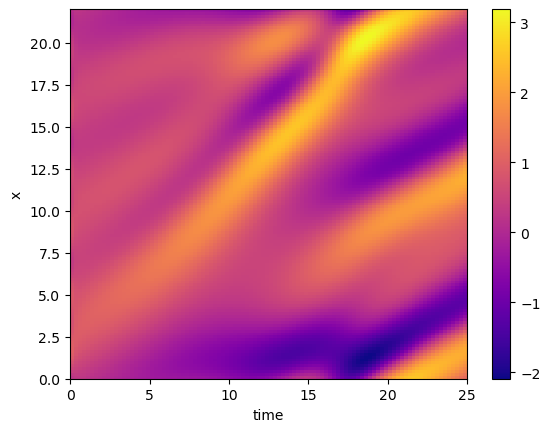

In [7]:
cm = plt.pcolormesh(t, x_plot, data_result[:-1].T, cmap='plasma')
plt.xlabel('time')
plt.ylabel('x')
plt.colorbar(cm)

# Animate system

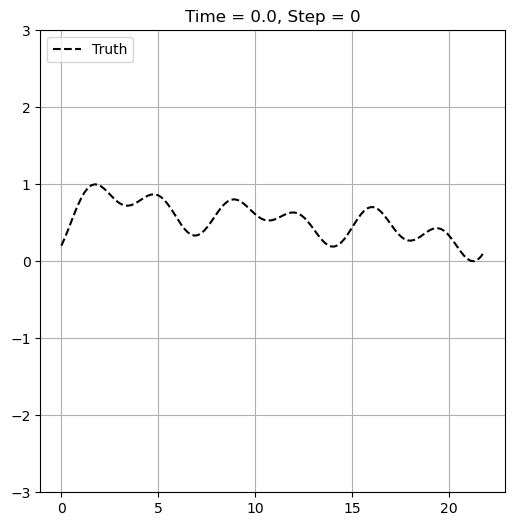

In [8]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(6,6))

# Plot the initial frame. 
# line1, = ax.plot(x, num_result[0,:], label='Numerical')
# line2, = ax.plot(x, ml_result[0,:], label='ML')
line3, = ax.plot(x, data_result[0,:], label='Truth', c='black', linestyle='--')
ax.legend(loc='upper left')
ax.set_ylim([-3,3])
ax.grid()
# ax.set_xlim([0,1])

skip=1

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    # line1.set_data(x, num_result[frame*skip,:])
    # line2.set_data(x, ml_result[frame*skip,:])
    line3.set_data(x, data_result[frame*skip,:])
    ax.set_title("Time = " + str(np.round(dt*frame*skip, 4)) + f", Step = {frame*skip}")


# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=(len(data_result)-skip)//skip,       # Could also be iterable or list
    interval=dt*1000*skip     # ms between frames
)

HTML(ani.to_jshtml())